In [26]:
# Importing Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#importing the dataset which I have downloaded from Kaggle
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [40]:
# Getting The info of the table and it's Entites.
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [29]:
# Drop duplicates
df = df.drop_duplicates()

# Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Count number of TV Shows & Movies.
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [33]:

# Top 10 Countries by Content Count (Table)

top10_countries = df['country'].value_counts().head(10).reset_index()
top10_countries.columns = ['Country', 'Number of Titles']


# Also print dataframe (Excel-like)
top10_countries


,Country,Number of Titles
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199
5,Canada,181
6,Spain,145
7,France,124
8,Mexico,110
9,Egypt,106


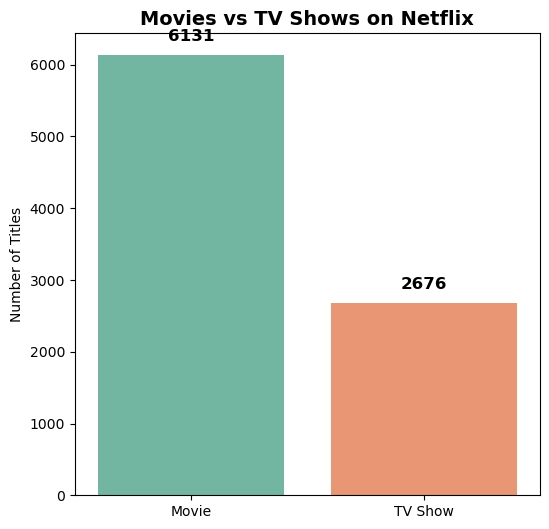

In [42]:
# ---------------------------
# Movies vs TV Shows (Improved, Warning Fixed)
# ---------------------------
plt.figure(figsize=(6,6))

counts = df['type'].value_counts().reset_index()
counts.columns = ['Type', 'Count']

sns.barplot(data=counts, x="Type", y="Count", hue="Type", palette="Set2", legend=False)

# Add counts on bars
for i, row in counts.iterrows():
    plt.text(i, row['Count']+200, row['Count'], ha='center', fontsize=12, fontweight='bold')

plt.title("Movies vs TV Shows on Netflix", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Number of Titles")
plt.show()


# Insight:
# Netflix has more movies than TV shows overall, 
# but this doesn't reflect the sharp growth in shows after 2015.

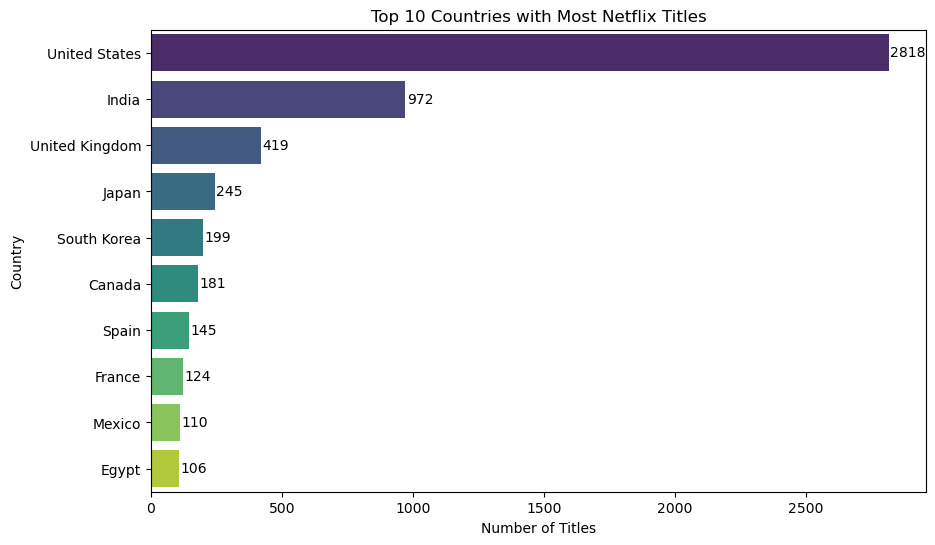

In [37]:
# Top Countries with most Netflix Titles
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    hue=top_countries.index,
    palette="viridis",
    legend=False
)

# Add numbers at the end of bars
for i, value in enumerate(top_countries.values):
    ax.text(value + 5, i, str(value), va='center')  # +5 shifts text a little right

plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

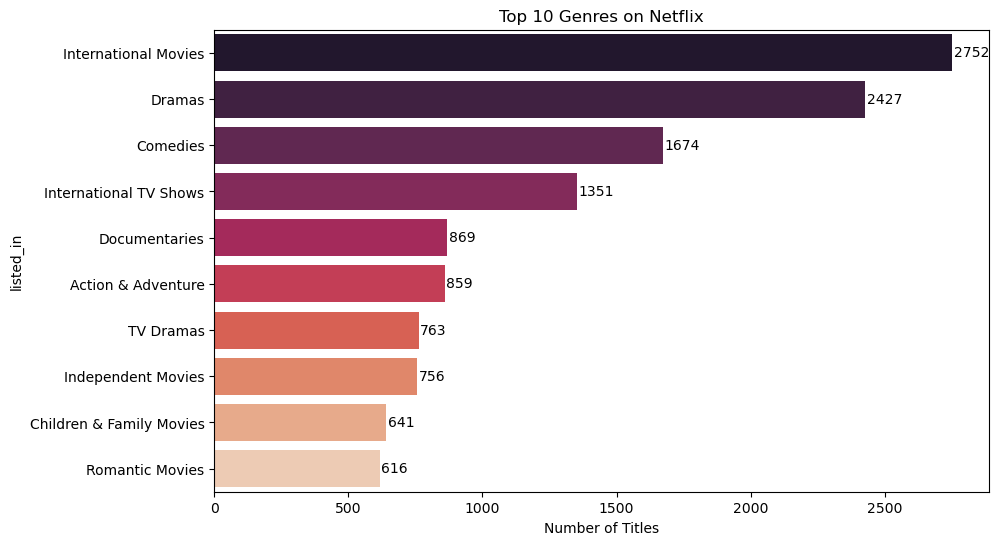

In [44]:
# Most Watched Genere on Netflix.
all_genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,
    palette="rocket",
    legend=False
)

# Add numbers at the end of bars

for i, value in enumerate(top_genres.values):
    ax.text(value + 5, i, str(value), va='center')

plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.show()

# Movies are the most watched Right now.
# in recent years the amount of TV Shows has inresased and are still increasing.

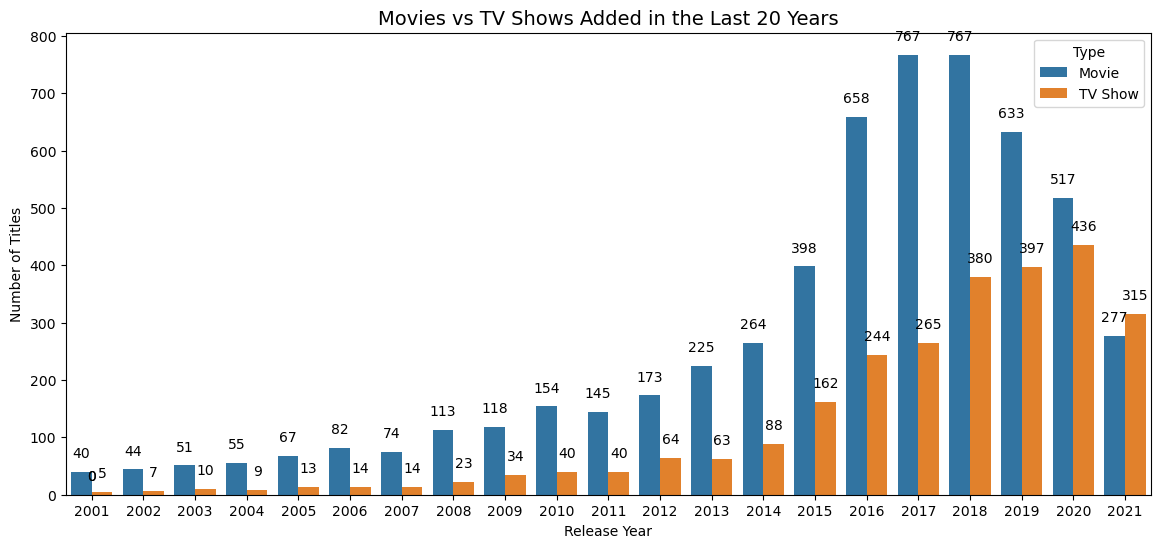

In [45]:

# Trend Over Last 20 Years (Vertical Bar Chart)

df['release_year'] = df['release_year'].astype(int)

# Filter last 20 years
recent_df = df[df['release_year'] >= (df['release_year'].max() - 20)]

trend_recent = (
    recent_df.groupby(['release_year','type'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(14,6))
sns.barplot(
    data=trend_recent,
    x="release_year",
    y="count",
    hue="type"
)
plt.title("Movies vs TV Shows Added in the Last 20 Years", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Type")

# Add counts on bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2,
        height + 20,
        int(height),
        ha="center", va="bottom"
    )

plt.show()

# Insight: 
# Movies dominated earlier, but since 2015, TV shows are rising sharply.

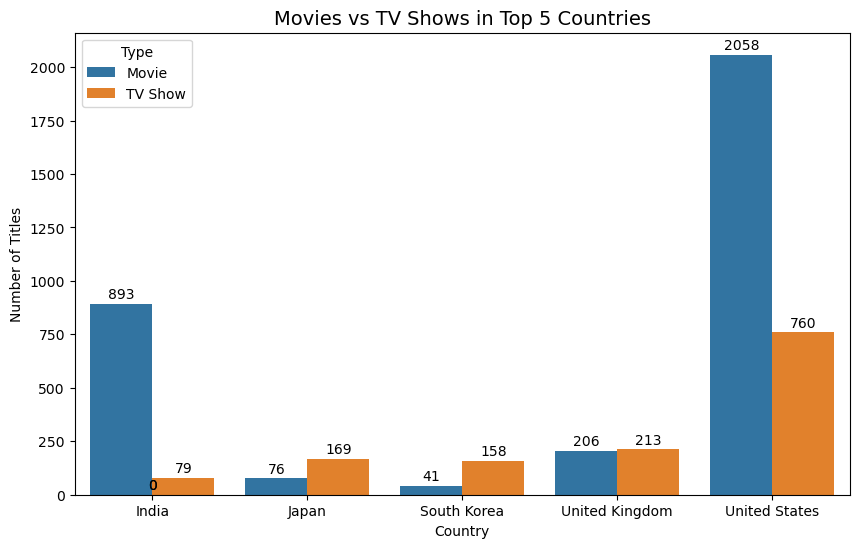

In [46]:
# Heatmap: Country vs Type (Grouped Bar Chart)

top5_countries = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top5_countries)]

country_type = (
    subset.groupby(['country', 'type'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=country_type,
    x="country",
    y="count",
    hue="type"
)
plt.title("Movies vs TV Shows in Top 5 Countries", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.legend(title="Type")

# Add counts on bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2,
        height + 10,
        int(height),
        ha="center", va="bottom"
    )

plt.show()

# Insight: 
# India and US have strong balance, while others are movie-heavy.

In [49]:

# Conclusions

# - Netflix started with a movie-heavy library but is shifting to TV shows post-2015.
# - The US is still the biggest content source, but India is rising fast.
# - Dramas dominate globally, but local preferences drive regional content.
# - Netflix is diversifying genres and countries to boost worldwide subscriptions.


In [58]:
# Limitations of the Dataset

 # No information on Revenue, viewership, or retention, 
 # So we cannot measure the true commercial success of titles.  
 # Missing values in fields like Rating, 
 # which may bias the analysis.  
 # The dataset does not include User-Preferences, Watch_time, or Churn_rates  
 # which are critical to understanding actual impact.  
 # Focused only on Netflix catalog (no competitor comparison).  
